In [1]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

# read the csv files

In [3]:
csv1_path = 'resources/file1_2018-09-20-14-42-11_4k.csv'
csv2_path = 'resources/file2_2018-09-20-15-04-20_g.csv'
csv3_path = 'resources/file3_2018-09-20-16-02-01_b.csv'

prop_df1 = pd.read_csv(csv1_path)
prop_df2 = pd.read_csv(csv2_path)
prop_df3 = pd.read_csv(csv3_path)
prop_df1.head(3)

,SALE TYPE,SOLD DATE,PROPERTY TYPE,CITY,STATE,ZIP,PRICE,BEDS,BATHS,LOCATION,...,HOA/MONTH,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
0,MLS Listing,NaN,Single Family Residential,Portland,OR,97211.0,27500.0,0.0,1.0,RODGER'S MARINA,...,NaN,Active,NaN,NaN,RMLS,18567126,N,Y,45.604756,-122.624335
1,MLS Listing,NaN,Vacant Land,Portland,OR,97210.0,30000.0,NaN,NaN,"Portland West, Raleigh Hills",...,NaN,Active,NaN,NaN,RMLS,18118897,N,Y,45.522837,-122.733173
2,MLS Listing,NaN,Vacant Land,Portland,OR,97220.0,34777.0,NaN,NaN,Portland Northeast,...,NaN,Active,NaN,NaN,RMLS,18454531,N,Y,45.554321,-122.553849


In [4]:
(prop_df1.shape, prop_df2.shape, prop_df3.shape)

((3716, 25), (387, 25), (133, 25))

# Merge all CSVs into one Dataframe

In [9]:
prop_df = prop_df1.append(prop_df2)
prop_df = prop_df.append(prop_df3)
prop_df.shape

(4236, 25)

# find if there are duplicates

In [10]:
prop_dup_index = prop_df.duplicated(['MLS#'])
prop_dup = prop_df[prop_dup_index]
prop_dup.shape

(209, 25)

In [11]:
prop_df.drop_duplicates(subset=['MLS#'], inplace=True)
prop_df.shape

(4027, 25)

In [12]:
prop_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'CITY', 'STATE', 'ZIP',
       'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'DAYS ON MARKET', '$/SQUARE FEET', 'HOA/MONTH', 'STATUS',
       'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME', 'SOURCE',
       'MLS#', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# clean column names some hace "illegal names"

In [13]:
prop_df.rename(index=str, columns={'$/SQUARE FEET':'PRICE PER SQFT',
                                  'HOA/MONTH':'HOA PER MONTH',
                                  'URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING)':'URL',
                                  'MLS#':'MLS'}, inplace=True)
prop_df.columns

Index(['SALE TYPE', 'SOLD DATE', 'PROPERTY TYPE', 'CITY', 'STATE', 'ZIP',
       'PRICE', 'BEDS', 'BATHS', 'LOCATION', 'SQUARE FEET', 'LOT SIZE',
       'YEAR BUILT', 'DAYS ON MARKET', 'PRICE PER SQFT', 'HOA PER MONTH',
       'STATUS', 'NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
       'SOURCE', 'MLS', 'FAVORITE', 'INTERESTED', 'LATITUDE', 'LONGITUDE'],
      dtype='object')

# Drop unnecessary columns
While it is beneficial to have a lot of features (columns) in our dataset, it is also important to drop those that are highly correlated to an existing field or a derivative of one or fields that we will never use. In the following, we drop fields that we will never use in this analysis.

In [14]:
prop_df.drop(columns=['SOLD DATE','NEXT OPEN HOUSE START TIME', 'NEXT OPEN HOUSE END TIME',
                     'FAVORITE', 'INTERESTED'], inplace=True)

# Find and fill missing values
Missing values in certain columns are critical - beds, bath, price, latitude, longitude. We will drop these rows. Missing values in remaining columns are not so critical, we will fill them with 0 or average values.

Before we fill, let us explore the histograms of numerical columns. With pandas, this can be accomplished with a single command as shown below:

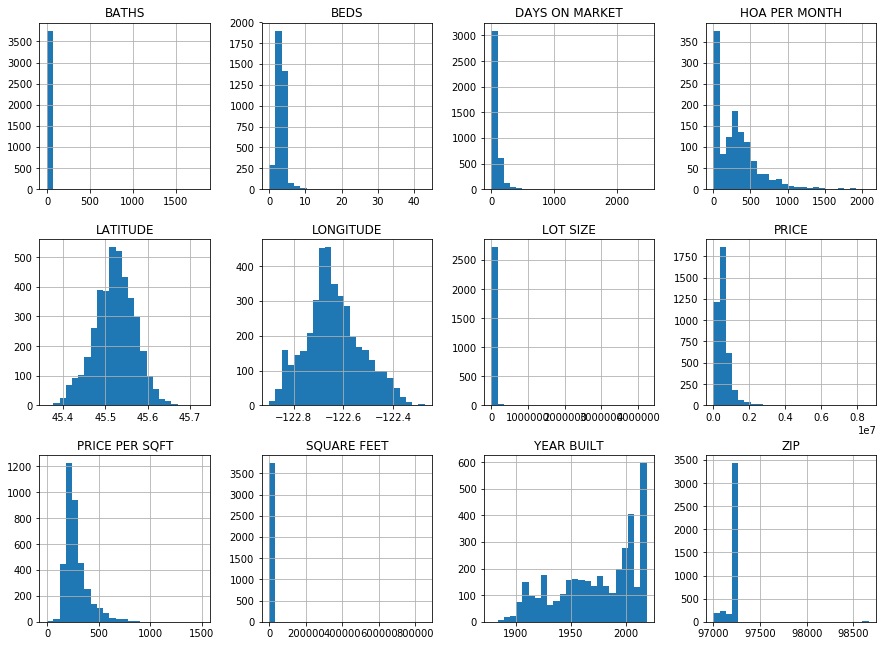

In [15]:
# explore distribution of numeric columns
ax_list = pbb

In [16]:
# drop rows with missing values in critical columns
prop_df_nona = prop_df.dropna(axis=0, how='any', # if any of these cols are empty, remove row
                              subset=['BEDS','BATHS', 'PRICE', 'YEAR BUILT', 'LATITUDE','LONGITUDE'])
prop_df_nona.shape

(3653, 20)

In [17]:
#Let us impute for missing values using different strategies for different columns.
prop_df_nona['HOA PER MONTH'].fillna(value=0, inplace=True)
prop_df_nona['LOT SIZE'].fillna(value=prop_df_nona['LOT SIZE'].median(), inplace=True)
prop_df_nona['PRICE PER SQFT'].fillna(value=prop_df_nona['PRICE PER SQFT'].median(), inplace=True)
prop_df_nona['SQUARE FEET'].fillna(value=prop_df_nona['SQUARE FEET'].median(), inplace=True)
prop_df_nona['YEAR BUILT'].fillna(value=prop_df_nona['YEAR BUILT'].mode(), inplace=True)
prop_df_nona['ZIP'].fillna(value=prop_df_nona['SQUARE FEET'].mode(), inplace=True)

C:\Users\Dara\AppData\Local\ESRI\conda\envs\arcgispro-py3-clone\lib\site-packages\pandas\core\generic.py:5434: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


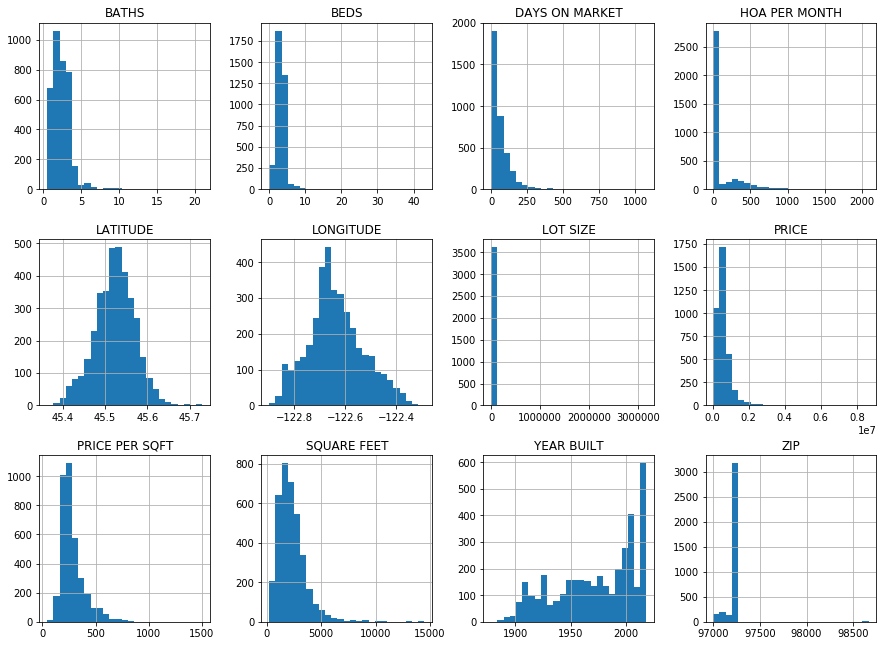

In [19]:
# explore distribution of numeric columns
ax_list = prop_df_nona.hist(bins=25, layout=(4,4), figsize=(15,15))


# Explore distribution of numeric columns
As can be seen from histogram, some numeric columns are heavily sqewed by outliers. Let us pull up statistics for each of these columns

In [20]:
prop_df_nona.describe().round(3)

,ZIP,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE,YEAR BUILT,DAYS ON MARKET,PRICE PER SQFT,HOA PER MONTH,LATITUDE,LONGITUDE
count,3653.000,3653.000,3653.000,3653.000,3653.000,3653.000,3653.000,3653.000,3653.000,3653.000,3653.000,3653.000
mean,97210.091,609851.635,3.316,2.428,2291.079,13448.155,1973.970,62.268,281.446,105.865,45.523,-122.638
std,93.873,458104.003,1.762,1.340,1342.049,72390.700,36.279,72.488,118.235,223.111,0.048,0.108
min,97002.000,35000.000,0.000,0.500,212.000,25.000,1878.000,1.000,44.000,0.000,45.363,-122.899
25%,97206.000,359900.000,2.000,2.000,1400.000,5227.000,1948.000,15.000,206.000,0.000,45.491,-122.704
50%,97217.000,495000.000,3.000,2.500,2062.000,6969.000,1980.000,42.000,251.000,0.000,45.524,-122.651
75%,97229.000,699934.000,4.000,3.000,2862.000,8712.000,2006.000,84.000,321.000,74.000,45.554,-122.573
max,98664.000,8650000.000,43.000,21.000,14500.000,3167247.000,2019.000,1080.000,1505.000,2091.000,45.730,-122.290


# Build statistical filters to remove outliers
In this segment, we build $6\sigma$ and Inter Quartile Range (IQR) filters to remove outliers from our dataset.

In [22]:
def six_sigma_filter(df, column):
    sigma = df[column].std()
    mu = df[column].mean()
    three_sigma = [mu-(3*sigma), mu+(3*sigma)]
    print("Column:{}, Mean:{}, Sigma:{}, 3sigma_range: {}:{}".format(column,mu.round(3),
                                                                       sigma.round(3),
                                                                       three_sigma[0].round(2),
                                                                       three_sigma[1].round(2)))
    
    # filter
    df_to_keep = df[(df[column] > three_sigma[0]) & (df[column] < three_sigma[1])]
    
    # prints
    num_rows_dropped = prop_df.shape[0] - df_to_keep.shape[0]
    print("Number of rows dropped: " + str(num_rows_dropped))
    
    return df_to_keep

In [23]:
def iqr_filter(df, column):
    med = df[column].median()
    p_25 = df[column].quantile(q=0.25)
    p_75 = df[column].quantile(q=0.75)
    
    # find valid range
    iqr_range = [med-(2*p_25), med+(2*p_75)]
    print("Column: {}, Median:{}, 25%:{}, 75%:{}, IQR:{}:{}".format(column,med,
                                                                    p_25,p_75,
                                                                    iqr_range[0].round(2),
                                                                    iqr_range[1].round(2)))
    
    # filter
    df_to_keep = df[(df[column] > iqr_range[0]) & (df[column] < iqr_range[1])]
    
    #prints
    num_rows_dropped = prop_df.shape[0] - df_to_keep.shape[0]
    print("Number of rows dropped: " + str(num_rows_dropped))
    
    return df_to_keep

# Filter columns using both filters and compare

In [24]:
prop_df2 = six_sigma_filter(prop_df_nona, 'BATHS')

Column:BATHS, Mean:2.428, Sigma:1.34, 3sigma_range: -1.59:6.45
Number of rows dropped: 422
